<a href="https://colab.research.google.com/github/wxya2017/GR5242-CIFAR10/blob/master/Final_Project_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image

# GR5242 Final Project Report-CIFAR10

### Team members:
- Wei, Xiaoya (Section1, xw2513@columbia.edu)
- Dong, Jiaqi (Section1, jd3418@columbia.edu)
- Yu, Wenting (Section2, wy2294@columbia.edu)


## Project Description

## Data Preprcocessing

## Model

### 1. CNN Baseline
First, we construct a CNN baseline model with only few layers to fit the data. We also take output layer into model to get rid of overfitting. Through visualizating the convolution layer, we can better understand how the network work with the pictures.

 **$\bullet$ Structure **

 *   Input: $32\times32\times3$  preprocessed image
*   Conv2D with ReLu: kernel size: $3\times3$  filter numbers: 32
*   Conv2D with ReLu: kernel size: $3\times3$  filter numbers: 32
*   MaxPooling2D: pool size: $2\times2$
*   Dropout: 0.5
*   Conv2D with ReLu: kernel size: $3\times3$  filter numbers: 64
*   Conv2D with ReLu: kernel size: $3\times3$   filter numbers: 64
*   MaxPooling2D:pool size: $2\times2$
*   Dropout: 0.3
*   Dense with Softmax: 10 units
 *  Output: 10 probabilities
 *  Optimizer: Adam

 **$\bullet$ Result**
 

The plots below show the training process, test accuracy and test heatmap.




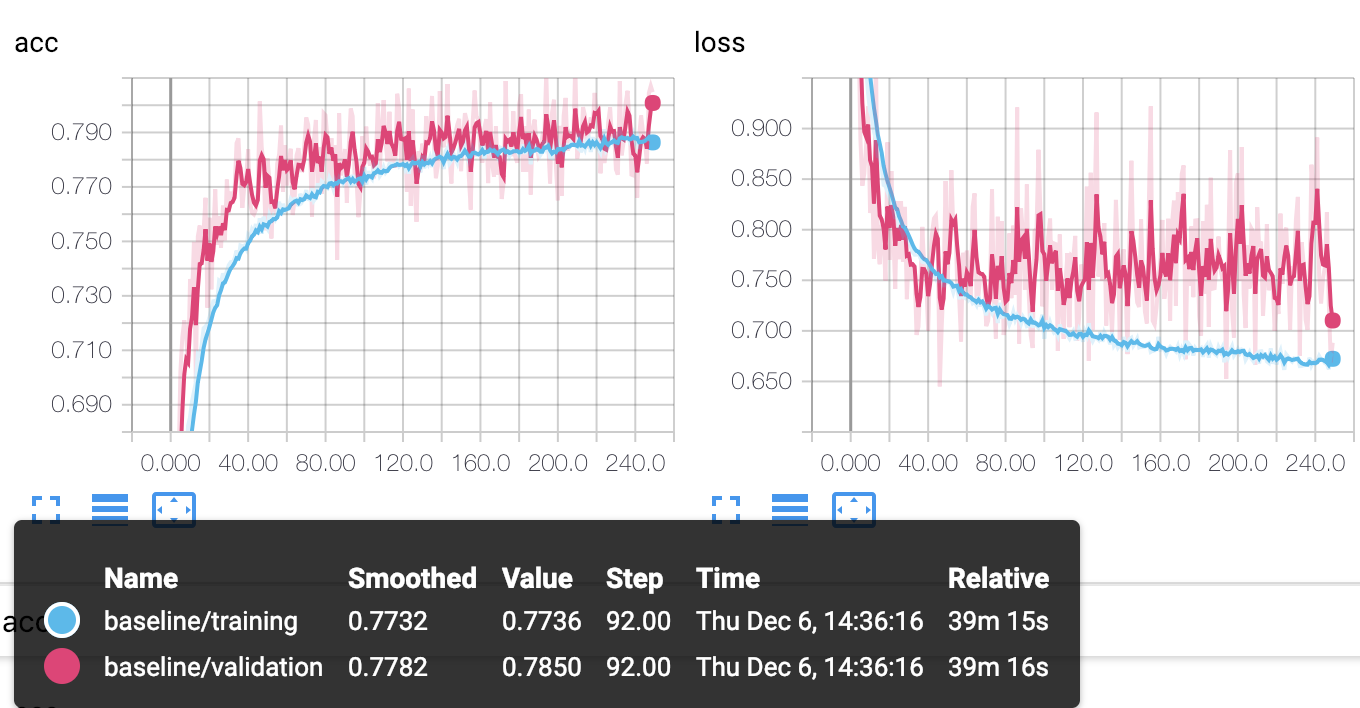

In [15]:
#@title
Image('baseline_train.png',width=500,height=250)

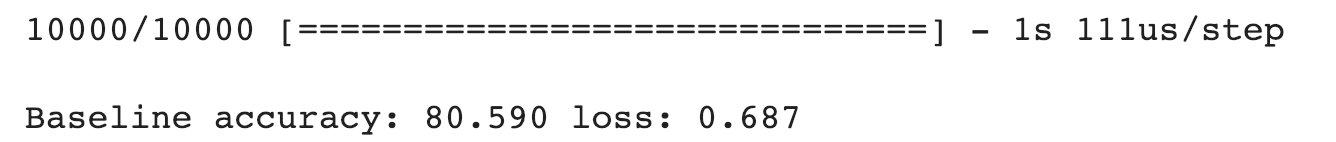

In [13]:
#@title
Image('baseline_accuracy.png',width=300,height=60)

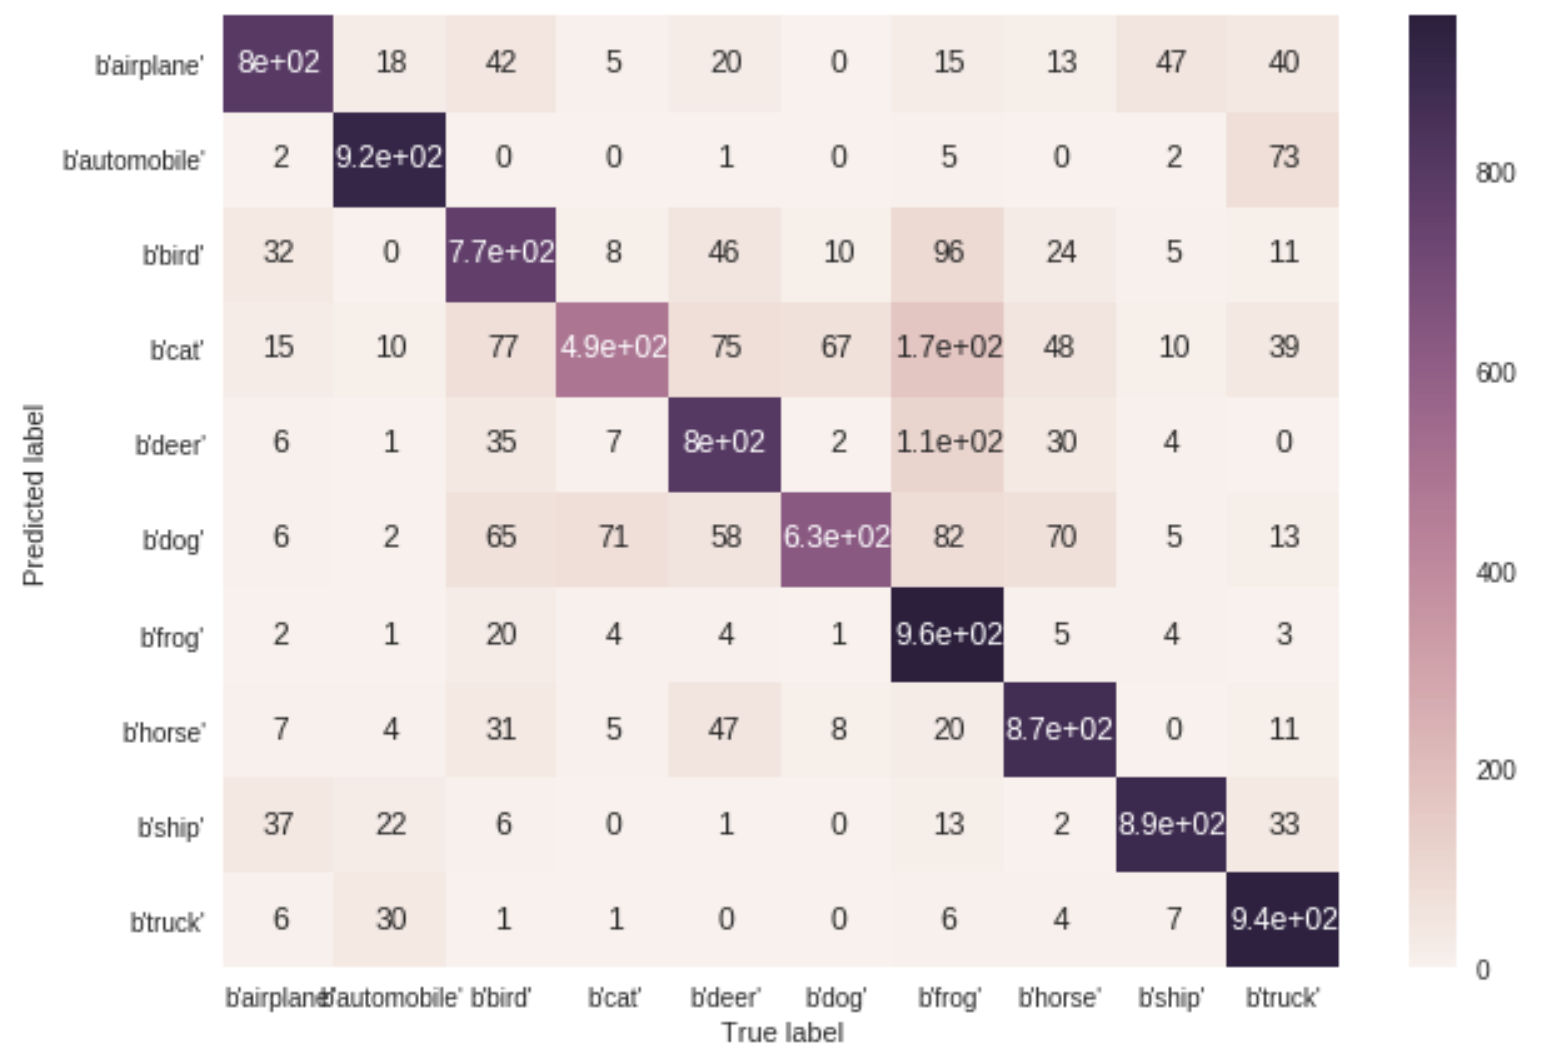

In [17]:
#@title
Image('baseline_heatmap.png',width=400,height=300)

**$\bullet$  Comment**


*   It is obvious that even though the network is not deep and wide, we can still get a relatively high accuracy with short training time. 
*  According to the heatmap, we can find the model does not work well on distinguishing animals like bird, cat, deer and dog. There are many images being false predicted to frog.
*   We also investigate the inner layer ouput in order to better understand how the 'black box' handle the features of input images. For example, we take the image of ship and investigate the fiters output of first convolution layer. The filters with different weights will focus on different parts of the image which helps to do classification.







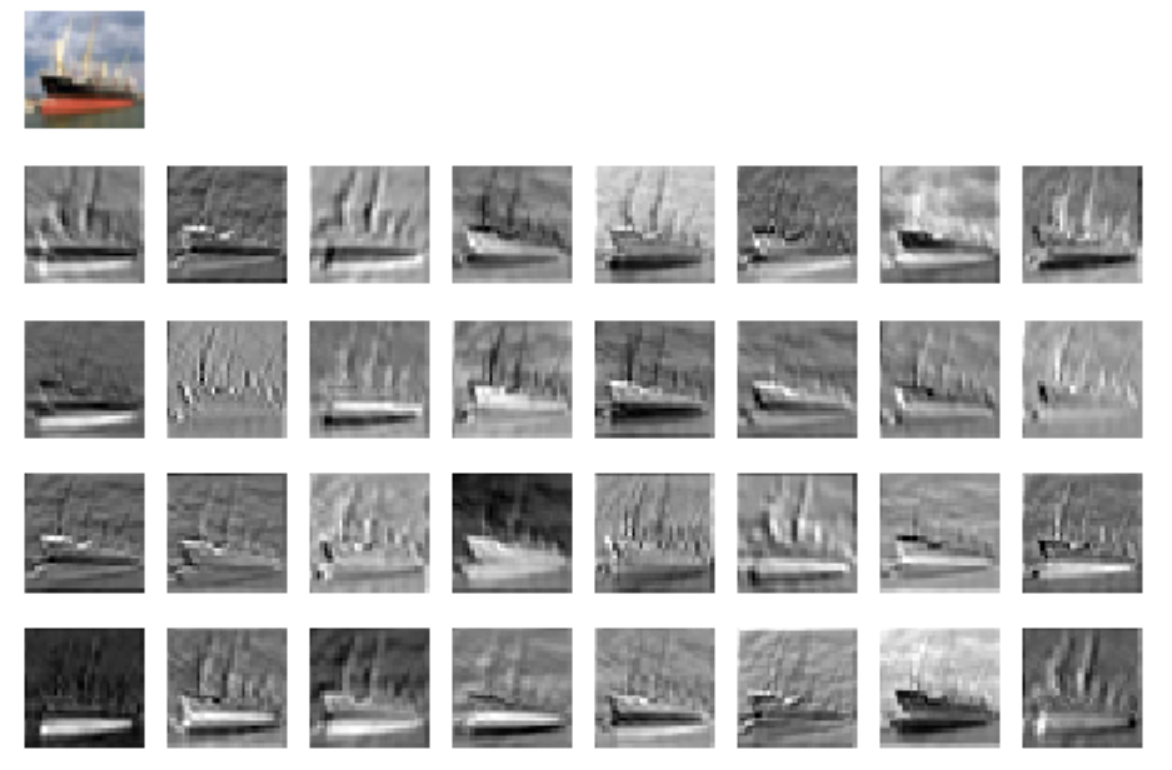

In [18]:
#@title
Image('baseline_conv1.png',width=400,height=300)

### 2. CNN

 **$\bullet$ Structure **

 **$\bullet$ Result**

 **$\bullet$ Comment**

### 3. NIN

NIN, Network in Network, is a deep network structure prorosed in 2014 which enhances model discriminability for local patches within the receptive field. 

There are mainly 2 changes in NIN:

1. **MLP Layer** maps the input local patch to the output feature vector with a multilayer perceptron (MLP) consisting of multiple fully connected layers with nonlinear activation functions followed by a classic convolution layer with activation function. This kind of a more potent nonlinear function approximator can enhance the abstraction ability of the local model.

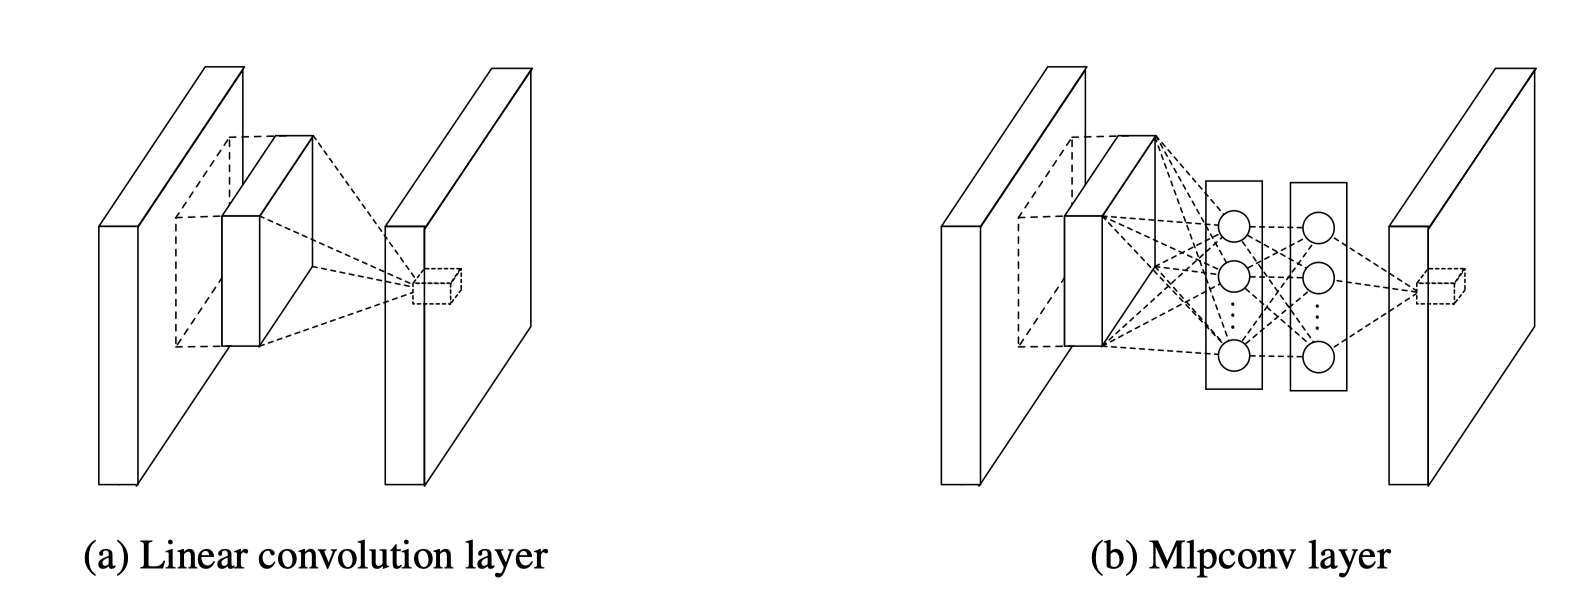

In [4]:
#@title
Image('mlp figure.png', width = 400, height = 200)

2. **Global Average Pooling Layer** replaces the traditional fully connected layers for classiﬁcation in CNN. NIN directly outputs the spatial average of the feature maps from the last MLPlayer as the conﬁdence of categories via a global average pooling layer, and then the resulting vector is fed into the softmax layer.This kind of structure will help us to better interpret the how the model to do classification (We will discuss more in comment.) and also reduce a huge amount of parameters without fully connected layer.

 **$\bullet$ Structure**
 *  Input: $32\times32\times3$  preprocessed image
 * MLP-1:
*   Conv2D with BatchNorm and ReLu: kernel size: $5\times5$  filter numbers: 192
*   Conv2D with BatchNorm and ReLu: kernel size: $1\times1$  filter numbers: 160
*   Conv2D with BatchNorm and ReLu: kernel size: $1\times1$  filter numbers: 96
*   MaxPooling2D: pool size: $3\times3$, stride: $2\times2$
 * MLP-2:
*   Conv2D with BatchNorm and ReLu: kernel size: $5\times5$  filter numbers: 192
*   Conv2D with BatchNorm and ReLu: kernel size: $1\times1$  filter numbers: 192
*   Conv2D with BatchNorm and ReLu: kernel size: $1\times1$  filter numbers: 192
*   MaxPooling2D: pool size: $3\times3$, stride: $2\times2$
 * MLP-3:
*   Conv2D with BatchNorm and ReLu: kernel size: $3\times3$  filter numbers: 160
*   Conv2D with BatchNorm and ReLu: kernel size: $1\times1$  filter numbers: 160
*   Conv2D with BatchNorm and ReLu: kernel size: $1\times1$  filter numbers: 160
*   MaxPooling2D: pool size: $3\times3$, stride: $2\times2$

 * MLP-4:
*   Conv2D with BatchNorm and ReLu: kernel size: $3\times3$  filter numbers: 160
*   Conv2D with BatchNorm and ReLu: kernel size: $1\times1$  filter numbers: 160
*   Conv2D with BatchNorm and ReLu: kernel size: $1\times1$  filter numbers: 10
 *  GlobalAveragePooling2D with Softmax
 *  Output: 10 probabilities
 *  Optimizer: SGD with changing Learning Rate

 **$\bullet$ Result**

The plots below show the training process, test accuracy and test heatmap.

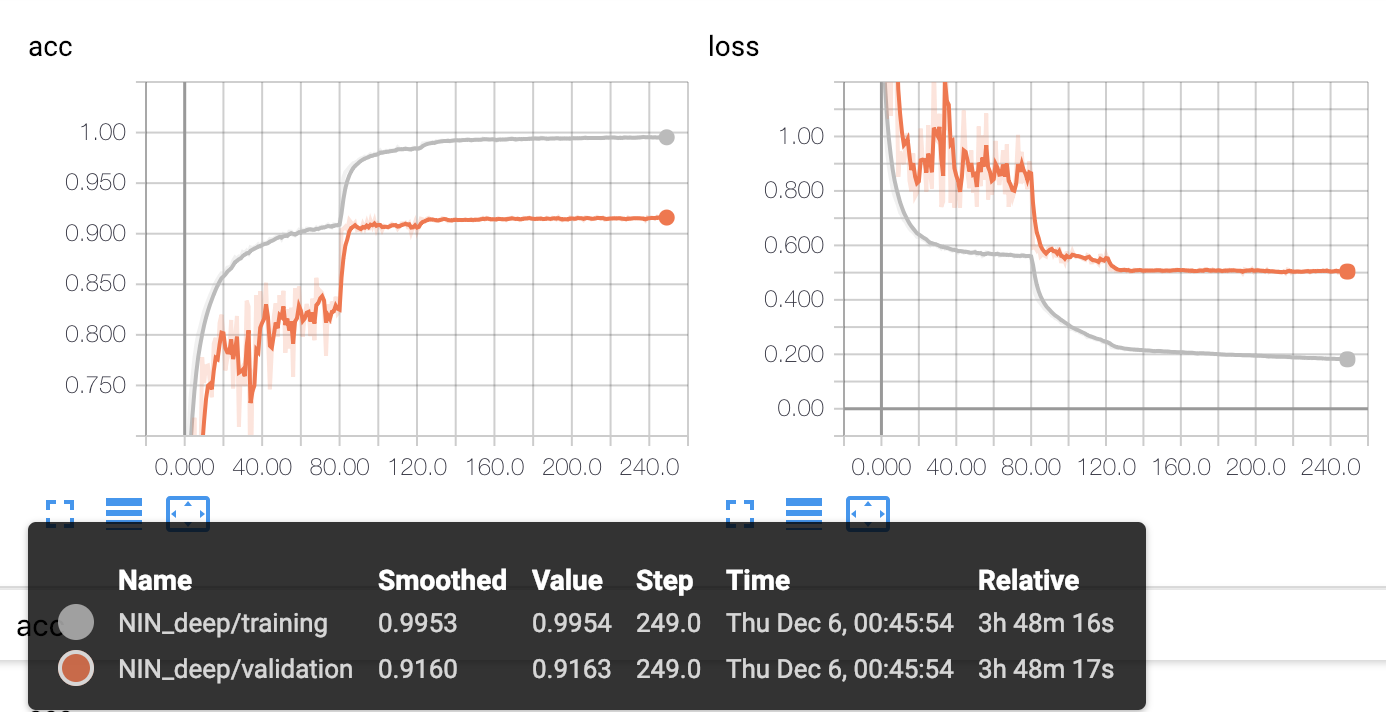

In [20]:
#@title
Image('nin_train.png', width=500,height=250)

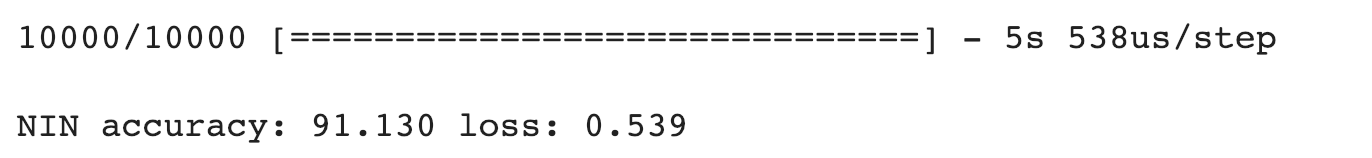

In [22]:
#@title
Image('nin_accuracy.png', width=300,height=60)

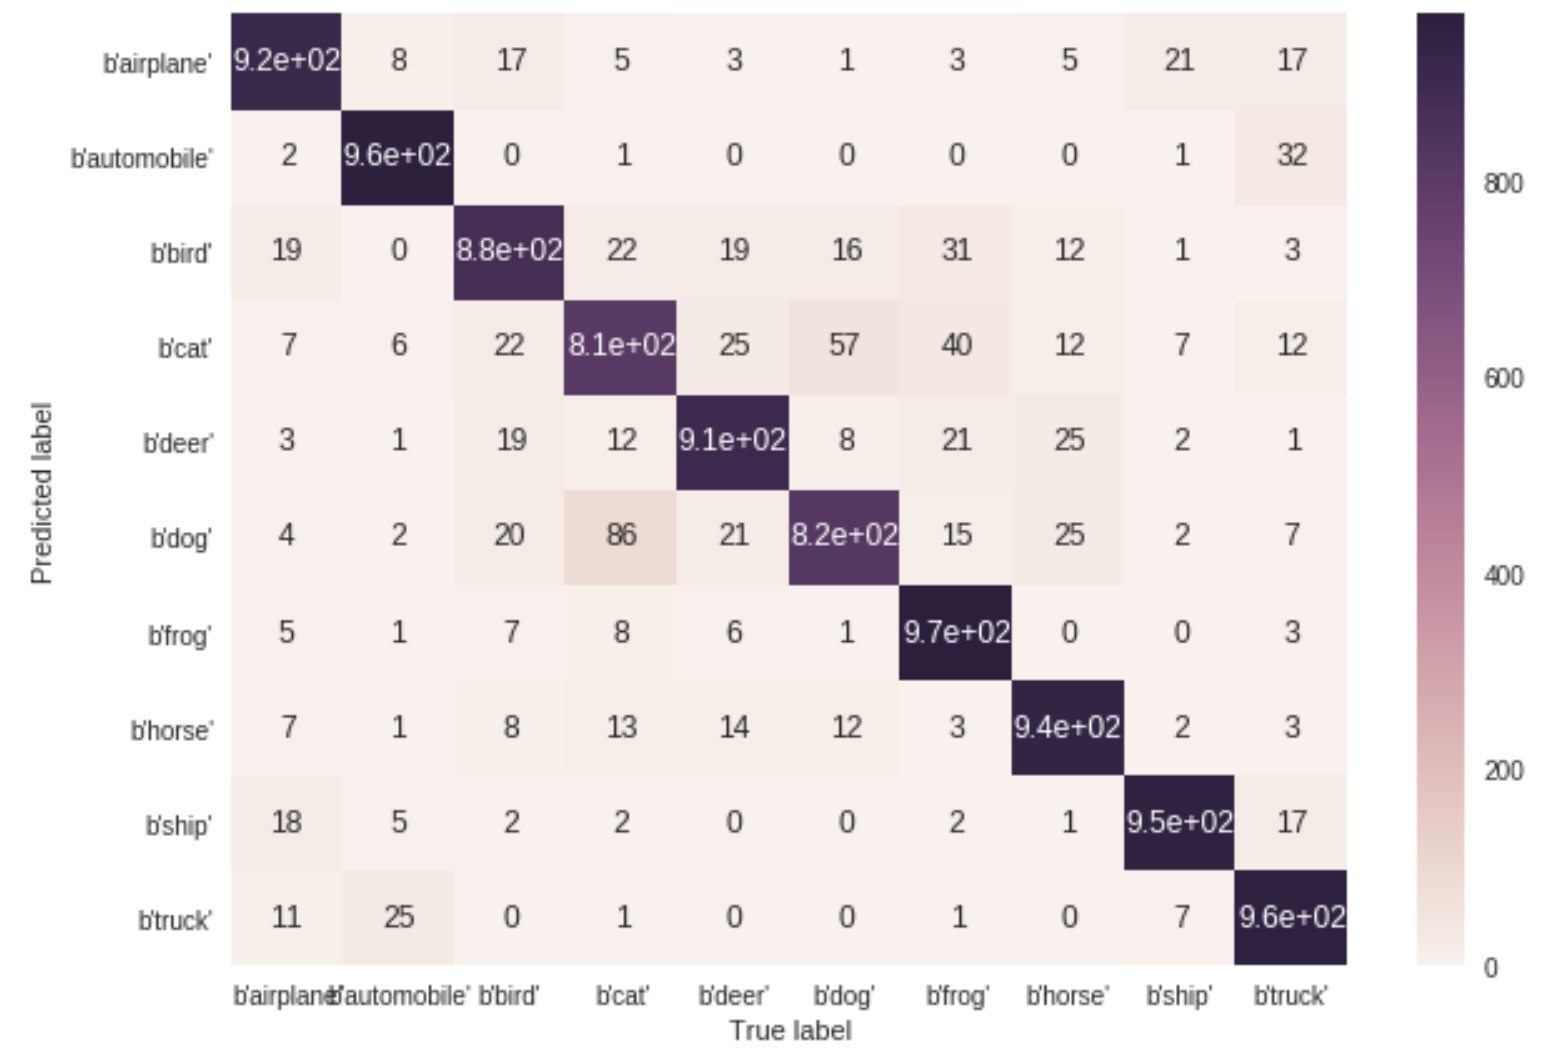

In [24]:
#@title
Image('nin_heatmap.png', width=400,height=300)

**$\bullet$  Comment**


*   From the training process image, it is obvious that there is a step at epoch 80 where is actually the place learning rate changes. So the design of learning rate is essential in this model. What's more, we also tried different data augmentation process with different rotation angle and flip, the accuracy of trainging also changes significantly. The plot below is the comparison of final model with different learning rate scheduler and data augmentation process.
*(NIN_deep is final model, NIN_deep_old is same structure but with default setting of augmentation and simple learning rate design)*

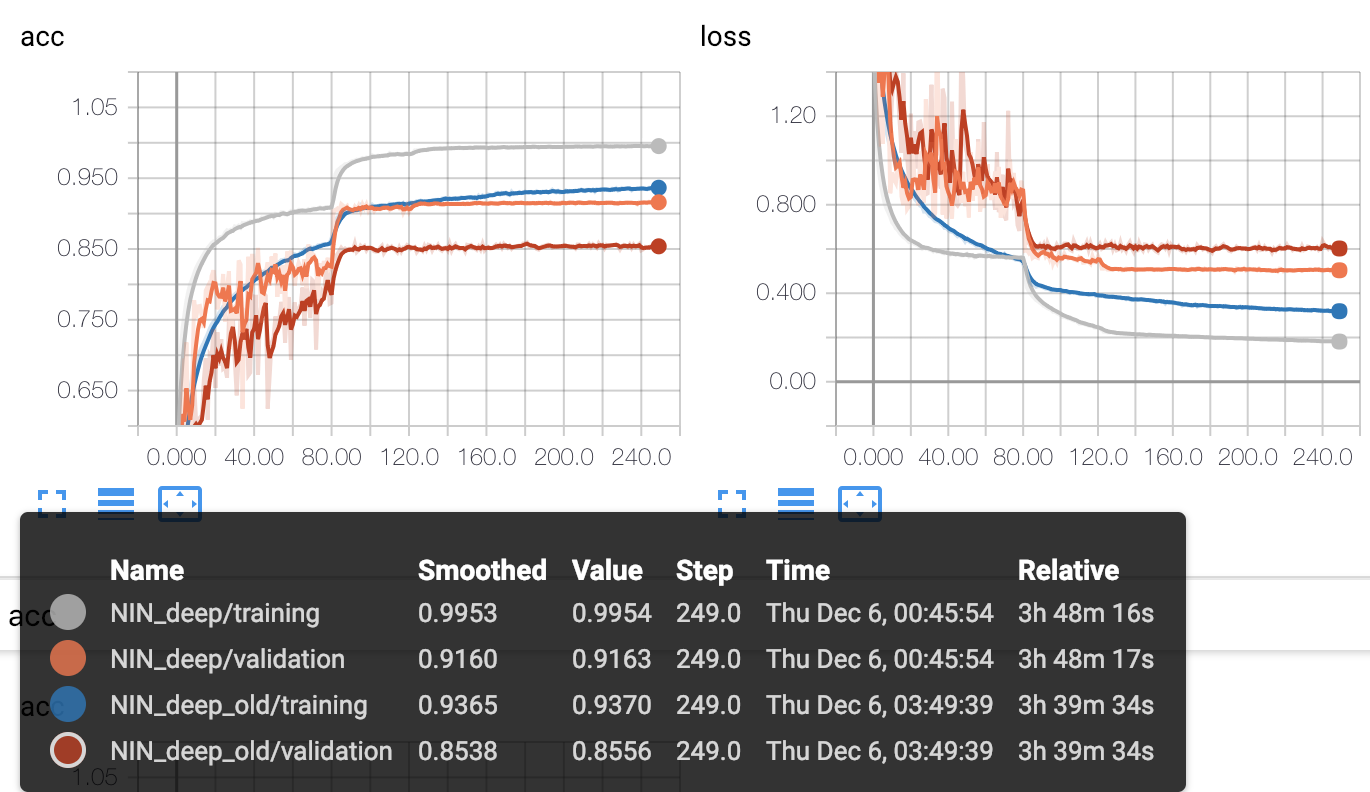

In [25]:
#@title
Image('nin_compare.png', width=500,height=250)

*  Besides design learning rate scheduler ourselves, we also tried the optimizer AdaDelta method which is an adaptive learning rate method. We campared the result on the NIN base model and found SGD with self-design learning rate scheduler works better here. 
*(NIN_adad uses optimizer AdaDelta and NIN_sgd uses self-design learning rate scheduler)*



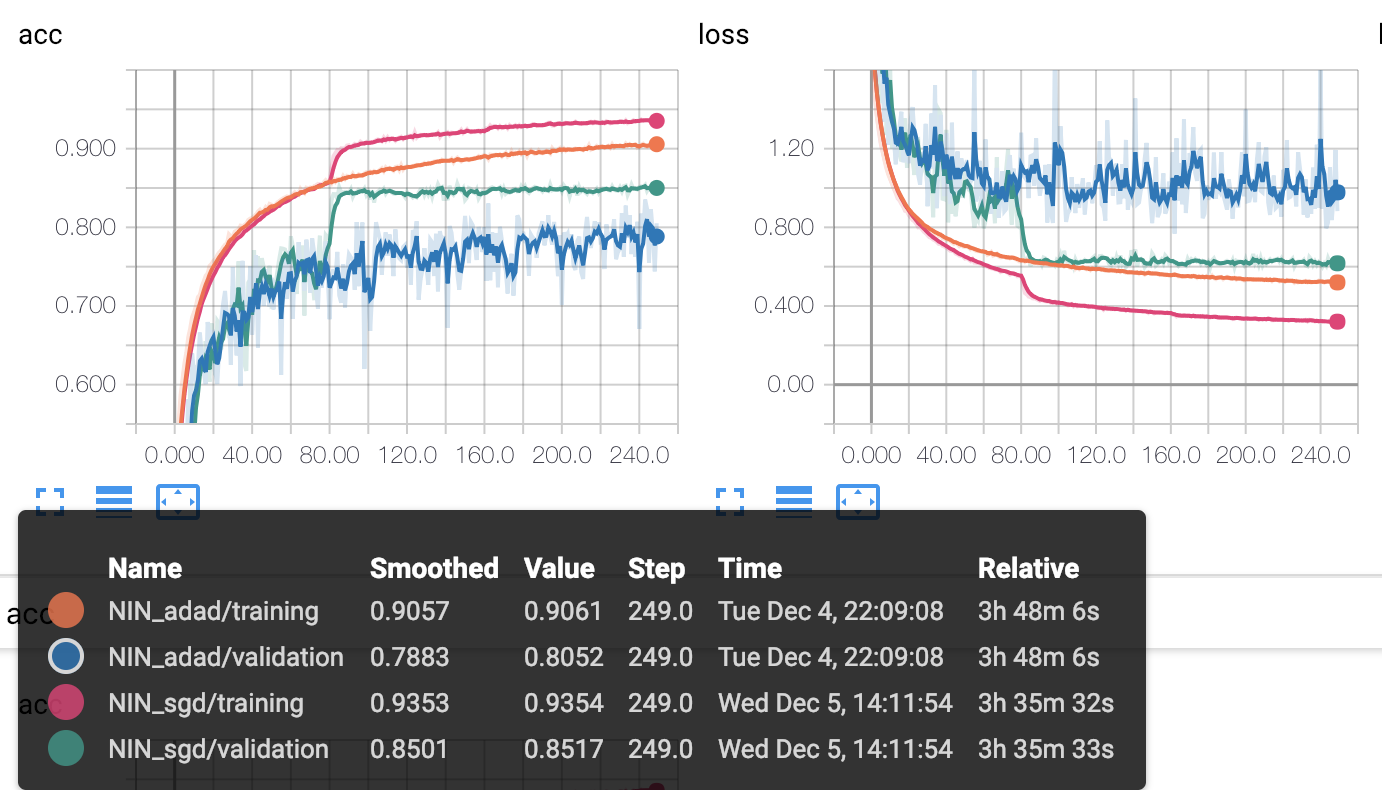

In [26]:
#@title
Image('nin_optimizer.png', width=500,height=250)



* NIN model helps better interpret the how the model to do classification because of global average pooling, so we want to know how this work. By investigating the last layer of MLP-4 we can obvious  get the point. 
*(We take one image of each class from test set and plot the 10 filters for each image. As the predict class is same as true class, the diaganal filters should be more lighter than those off diaganal.)*

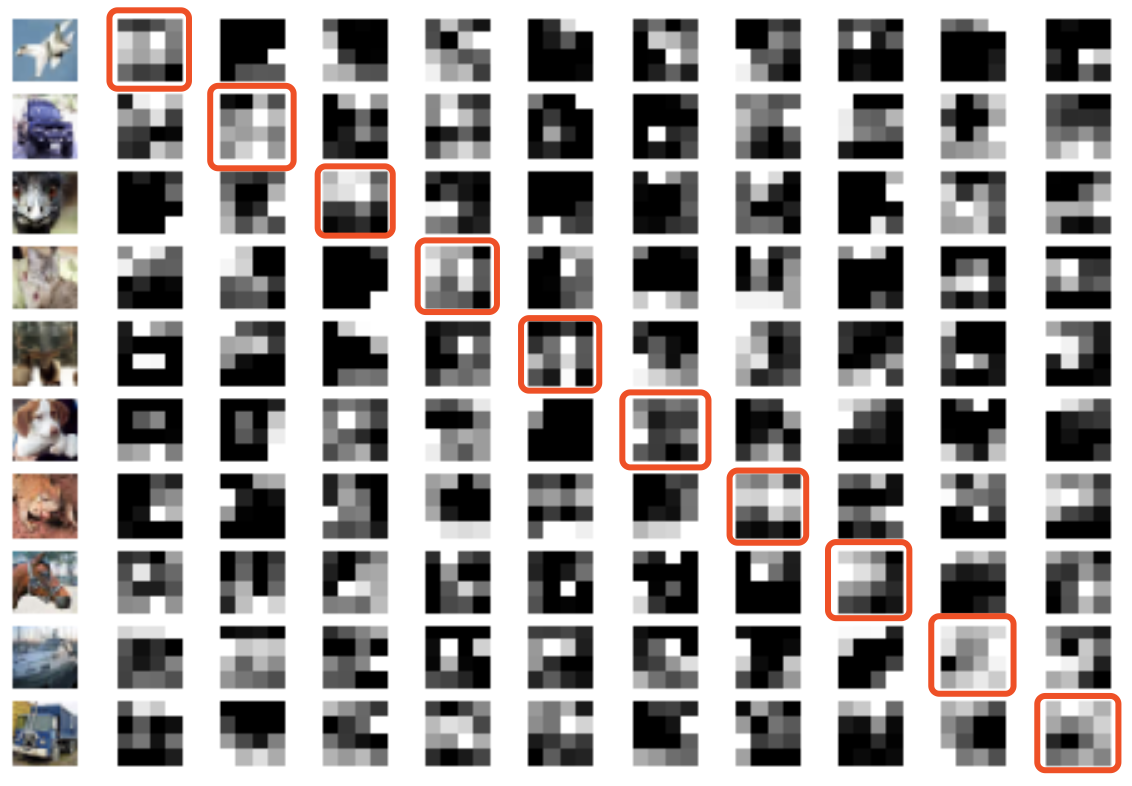

In [29]:
Image('nin_finallayer.png', width=400, height=300)

## Conclusion

### 1. Model Comparison

### 2. Future Work

## Reference

[1] Magnus Erik Hvass Pedersen. TensorFlow Tutorial #06. *https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/06_CIFAR-10.ipynb*

[2] Min Lin , Qiang Chen , Shuicheng Yan. Network In Network. arXiv:1312.4400v3 [cs.NE],  4 Mar 2014.

[3] Matthew D. Zeiler. ADADELTA: AN ADAPTIVE LEARNING RATE METHOD. arXiv:1212.5701v1 [cs.LG], 22 Dec 2012.
